# 01_data_loading.ipynb

In [33]:
!pip install seaborn

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
btc = pd.read_csv("BTC-USD.csv")
eth = pd.read_csv("ETH-USD.csv")
bnb = pd.read_csv("BNB-USD.csv")
ada = pd.read_csv("ADA-USD.csv")
doge = pd.read_csv("DOGE-USD.csv")
dot = pd.read_csv("DOT-USD.csv")
sol = pd.read_csv("SOL-USD.csv")
xrp = pd.read_csv("XRP-USD.csv")
ltc = pd.read_csv("LTC-USD.csv")
bch = pd.read_csv("BCH-USD.csv")

In [36]:
btc['crypto'] = 'BTC'
eth['crypto'] = 'ETH'
bnb['crypto'] = 'BNB'
ada['crypto'] = 'ADA'
doge['crypto'] = 'DOGE'
dot['crypto'] = 'DOT'
sol['crypto'] = 'SOL'
xrp['crypto'] = 'XRP'
ltc['crypto'] = 'LTC'
bch['crypto'] = 'BCH'

In [37]:
master_df = pd.concat(
    [btc, eth, bnb, ada, doge, dot, sol, xrp, ltc, bch],
    ignore_index=True
)


In [38]:
master_df['Date'] = pd.to_datetime(master_df['Date'])


In [39]:
master_df.sort_values(by=['crypto', 'Date'], inplace=True)


In [40]:
master_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,crypto
1287,2020-12-31,0.184034,0.185749,0.176594,0.181397,0.181397,1132268397,ADA
1288,2021-01-01,0.181382,0.184246,0.172022,0.175350,0.175350,1122218004,ADA
1289,2021-01-02,0.175359,0.184253,0.169233,0.177423,0.177423,1408849504,ADA
1290,2021-01-03,0.177382,0.208679,0.173376,0.204995,0.204995,2303857909,ADA
1291,2021-01-04,0.205236,0.239661,0.194450,0.224762,0.224762,3260699086,ADA


In [41]:
master_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,crypto
3391,2022-02-28,0.721931,0.788322,0.713188,0.782044,0.782044,3053923291,XRP
3392,2022-03-01,0.782070,0.800635,0.761234,0.784862,0.784862,2877778057,XRP
3393,2022-03-02,0.784876,0.784891,0.759598,0.768496,0.768496,2401047273,XRP
3394,2022-03-03,0.768532,0.783925,0.738920,0.752185,0.752185,2213014779,XRP
3395,2022-03-06,0.755771,0.757829,0.730040,0.734885,0.734885,1765211008,XRP


In [42]:
master_df['crypto'].value_counts()

crypto
ADA     429
BCH     429
BNB     429
BTC     429
DOGE    429
ETH     429
LTC     429
SOL     429
XRP     429
DOT     393
Name: count, dtype: int64

In [43]:
master_df.to_csv("crypto_master_data.csv", index=False)

# 02_data_cleaning.ipynb

In [44]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4254 entries, 1287 to 3395
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4254 non-null   datetime64[ns]
 1   Open       4254 non-null   float64       
 2   High       4254 non-null   float64       
 3   Low        4254 non-null   float64       
 4   Close      4254 non-null   float64       
 5   Adj Close  4254 non-null   float64       
 6   Volume     4254 non-null   int64         
 7   crypto     4254 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 299.1+ KB


In [45]:
master_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
crypto       0
dtype: int64

In [46]:
master_df = master_df[
    ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'crypto']
]

In [47]:
master_df.rename(columns={
    'Open': 'open_price',
    'High': 'high_price',
    'Low': 'low_price',
    'Close': 'close_price',
    'Volume': 'volume'
}, inplace=True)


In [48]:
master_df.sort_values(by=['crypto', 'Date'], inplace=True)


In [49]:
master_df.set_index('Date', inplace=True)


In [50]:
master_df.head()


,open_price,high_price,low_price,close_price,volume,crypto
Date,,,,,,
2020-12-31,0.184034,0.185749,0.176594,0.181397,1132268397,ADA
2021-01-01,0.181382,0.184246,0.172022,0.175350,1122218004,ADA
2021-01-02,0.175359,0.184253,0.169233,0.177423,1408849504,ADA
2021-01-03,0.177382,0.208679,0.173376,0.204995,2303857909,ADA
2021-01-04,0.205236,0.239661,0.194450,0.224762,3260699086,ADA


In [51]:
master_df.groupby('crypto').size()


crypto
ADA     429
BCH     429
BNB     429
BTC     429
DOGE    429
DOT     393
ETH     429
LTC     429
SOL     429
XRP     429
dtype: int64

In [52]:
master_df.to_csv("crypto_master_cleaned.csv")

# 03_multi_crypto_eda.ipynb

In [53]:
df = master_df.copy()

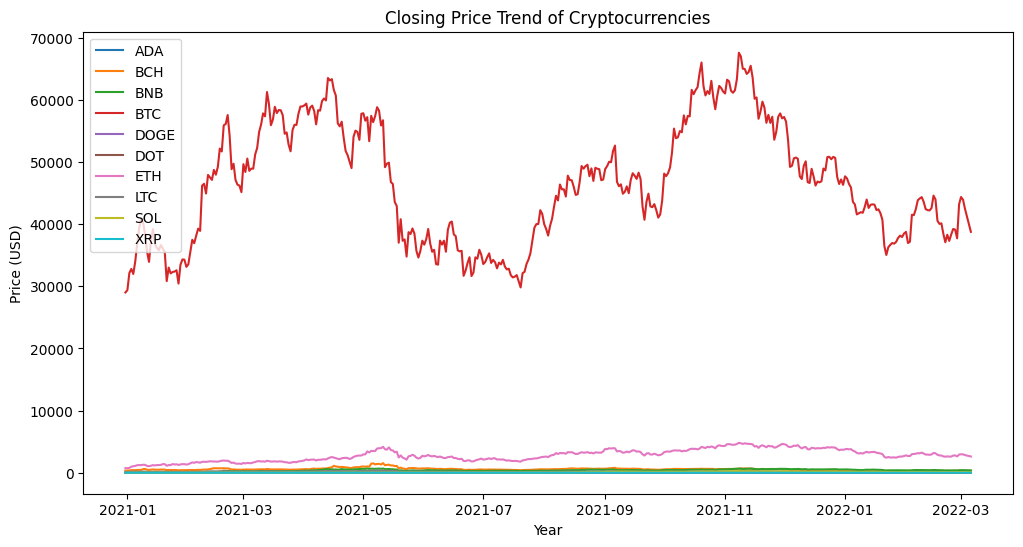

In [54]:
plt.figure(figsize=(12,6))

for crypto in df['crypto'].unique():
    subset = df[df['crypto'] == crypto]
    plt.plot(subset.index, subset['close_price'], label=crypto)

plt.title("Closing Price Trend of Cryptocurrencies")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_3700\3777325533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['MA_30'] = btc['close_price'].rolling(30).mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_3700\3777325533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth['MA_30'] = eth['close_price'].rolling(30).mean()


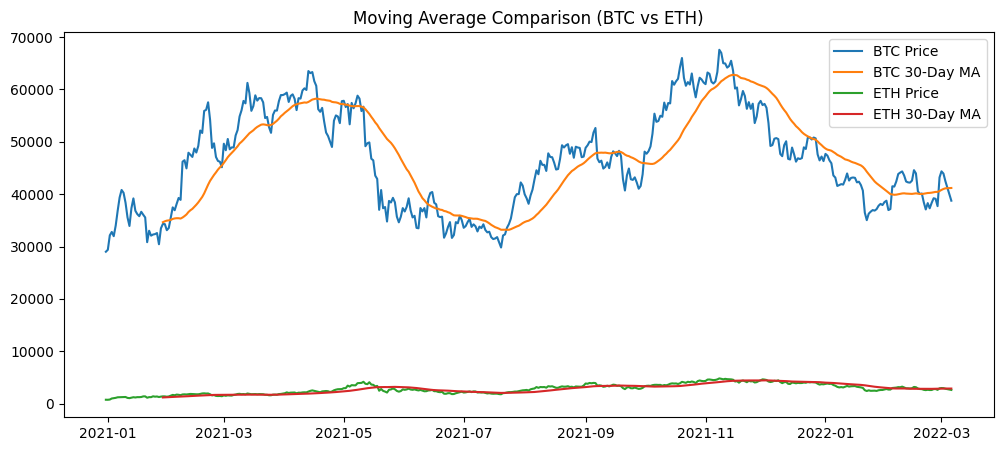

In [55]:
btc = df[df['crypto'] == 'BTC']
eth = df[df['crypto'] == 'ETH']

btc['MA_30'] = btc['close_price'].rolling(30).mean()
eth['MA_30'] = eth['close_price'].rolling(30).mean()

plt.figure(figsize=(12,5))
plt.plot(btc.index, btc['close_price'], label='BTC Price')
plt.plot(btc.index, btc['MA_30'], label='BTC 30-Day MA')
plt.plot(eth.index, eth['close_price'], label='ETH Price')
plt.plot(eth.index, eth['MA_30'], label='ETH 30-Day MA')
plt.legend()
plt.title("Moving Average Comparison (BTC vs ETH)")
plt.show()


In [56]:
df['daily_return'] = df.groupby('crypto')['close_price'].pct_change()

df['volatility_30'] = df.groupby('crypto')['daily_return'].rolling(30).std().reset_index(level=0, drop=True)


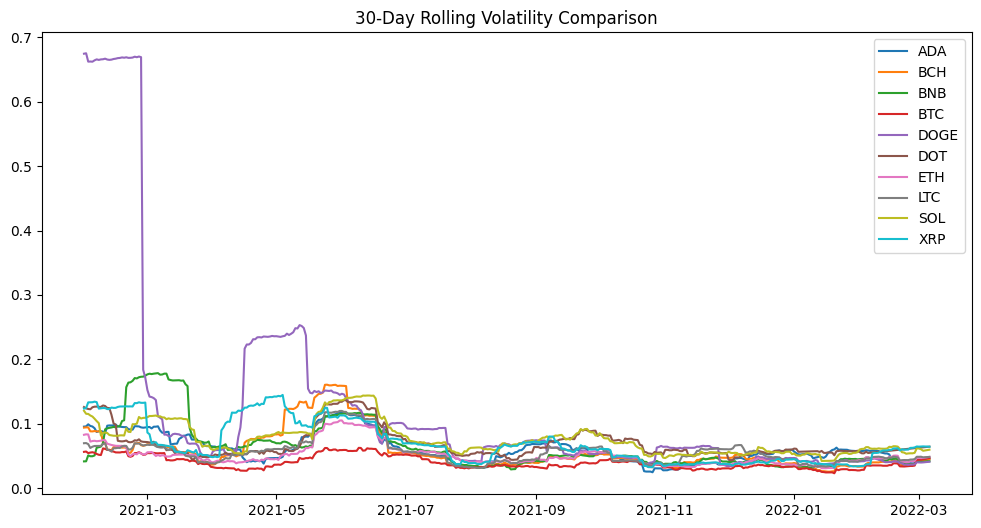

In [57]:
plt.figure(figsize=(12,6))

for crypto in df['crypto'].unique():
    subset = df[df['crypto'] == crypto]
    plt.plot(subset.index, subset['volatility_30'], label=crypto)

plt.title("30-Day Rolling Volatility Comparison")
plt.legend()
plt.show()


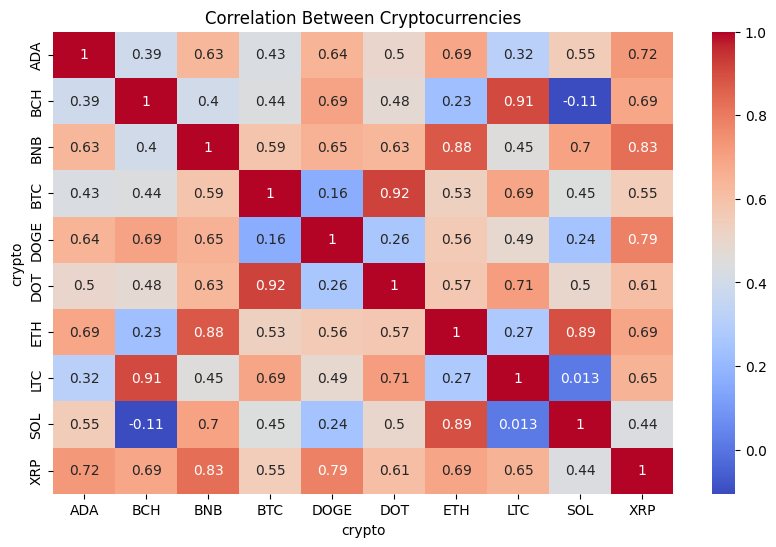

In [58]:
pivot_df = df.pivot_table(
    values='close_price',
    index=df.index,
    columns='crypto'
)

corr_matrix = pivot_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Cryptocurrencies")
plt.show()


# ARIMA & SARIMA Forecasting

In [59]:
import sys
!{sys.executable} -m pip install statsmodels

In [60]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [61]:
def get_crypto_series(df, crypto_name):
    crypto_df = df[df['crypto'] == crypto_name]
    ts = crypto_df['close_price']
    return ts


In [62]:
cryptos_to_model = ['BTC', 'ETH']

In [63]:
for crypto in cryptos_to_model:
    ts = get_crypto_series(master_df, crypto)
    result = adfuller(ts.dropna())
    print(f"{crypto} ADF p-value:", result[1])


BTC ADF p-value: 0.14522813963512338
ETH ADF p-value: 0.18141139407705564


In [64]:
arima_forecasts = []

for crypto in cryptos_to_model:
    ts = get_crypto_series(master_df, crypto)
    
    model = ARIMA(ts, order=(1,1,1))
    model_fit = model.fit()
    
    forecast = model_fit.forecast(steps=30)
    
    forecast_df = pd.DataFrame({
        'date': forecast.index,
        'forecast_price': forecast.values,
        'crypto': crypto,
        'model': 'ARIMA'
    })
    
    arima_forecasts.append(forecast_df)


C:\Users\HP\anaconda3\envs\crypto_ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\envs\crypto_ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\envs\crypto_ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\envs\crypto_ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning

In [65]:
arima_results = pd.concat(arima_forecasts)
arima_results.head()


,date,forecast_price,crypto,model
0,429,38787.245326,BTC,ARIMA
1,430,38760.937150,BTC,ARIMA
2,431,38778.639841,BTC,ARIMA
3,432,38766.727754,BTC,ARIMA
4,433,38774.743361,BTC,ARIMA


In [66]:
# Get last date from BTC historical data
btc_df = master_df[master_df['crypto'] == 'BTC']

last_date = btc_df.index[-1]

# Create future dates (30 days)
future_dates = pd.date_range(
    start=last_date + pd.Timedelta(days=1),
    periods=30,
    freq='D'
)

# Assign correct dates to forecasts
btc_arima['date'] = future_dates
btc_sarima['date'] = future_dates


NameError: name 'btc_arima' is not defined

In [ ]:
crypto = 'BTC'
ts = get_crypto_series(master_df, crypto)

btc_arima = arima_results[arima_results['crypto'] == crypto]

plt.figure(figsize=(12,5))
plt.plot(ts, label='Historical Price')
plt.plot(btc_arima['date'], btc_arima['forecast_price'], label='ARIMA Forecast')
plt.legend()
plt.title("BTC Price Forecast using ARIMA")
plt.show()


In [ ]:
sarima_forecasts = []

for crypto in cryptos_to_model:
    ts = get_crypto_series(master_df, crypto)
    
    model = SARIMAX(
        ts,
        order=(1,1,1),
        seasonal_order=(1,1,1,30)
    )
    
    model_fit = model.fit(disp=False)
    
    forecast = model_fit.forecast(steps=30)
    
    forecast_df = pd.DataFrame({
        'date': forecast.index,
        'forecast_price': forecast.values,
        'crypto': crypto,
        'model': 'SARIMA'
    })
    
    sarima_forecasts.append(forecast_df)


In [ ]:
sarima_results = pd.concat(sarima_forecasts)
sarima_results.head()


In [ ]:
plt.figure(figsize=(12,5))
plt.plot(btc_df.index, btc_df['close_price'], label='Historical')
plt.plot(btc_arima['date'], btc_arima['forecast_price'], label='ARIMA')
plt.plot(btc_sarima['date'], btc_sarima['forecast_price'], label='SARIMA')
plt.legend()
plt.title("BTC Forecast Comparison: ARIMA vs SARIMA")
plt.show()


In [ ]:
final_forecasts = pd.concat([arima_results, sarima_results])
final_forecasts.to_csv("arima_sarima_forecasts.csv", index=False)


## Step 5: Prophet Forecasting

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
btc_df.columns

In [ ]:
# Filter BTC data
btc_df = master_df[master_df['crypto'] == 'BTC'].copy()

# Create Prophet required columns explicitly
btc_df['ds'] = btc_df.index        # date from index
btc_df['y'] = btc_df['close_price']

# Keep only required columns
prophet_df = btc_df[['ds', 'y']]

# Ensure correct datatype
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])


In [ ]:
model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True
)

model.fit(prophet_df)


In [ ]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)


In [ ]:
model.plot(forecast)
plt.title("BTC Price Forecast using Prophet")
plt.show()


In [ ]:
prophet_forecast = forecast[['ds', 'yhat']].tail(30)
prophet_forecast['crypto'] = 'BTC'
prophet_forecast['model'] = 'Prophet'

prophet_forecast.head()


In [ ]:
prophet_forecast.to_csv("prophet_btc_forecast.csv", index=False)

## Step 6: LSTM Deep Learning Forecasting


In [ ]:
import sys
import numpy as np
import tensorflow as tf

print(sys.version)
print(np.__version__)
print(tf.__version__)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Filter BTC data
btc_df = master_df[master_df['crypto'] == 'BTC'].copy()

# Use close price only
prices = btc_df['close_price'].values.reshape(-1, 1)
